In [1]:
!pip install seaborn pandas numpy lasio scikit-learn matplotlib
# If this doesnt run, just do:
# "pip install seaborn pandas numpy lasio scikit-learn matplotlib" in the terminal. 
# You guys just need to install the pakage one time

In [9]:
from RegressionPipeline import RegressionPipeline
import seaborn as sns
import pandas as pd
import numpy as np
import random
import lasio
import os
import matplotlib.pyplot as plt

In [2]:
def readFile(address):
    df = pd.read_csv(address)
    # Remove the 'VARIABLE_FR' column
    df = df.drop(columns=['VARIABLE_FR'])

    # Drop rows where 'VARIABLE' is NaN
    df = df.dropna(subset=['VARIABLE'])

    # Filter out time
    df['DATE_TIME_HEURE'] = pd.to_datetime(df['DATE_TIME_HEURE'], errors='coerce')

    # Filter the DataFrame for dates from 2018 to the current year
    start_date = '2018-01-01'
    end_date = pd.to_datetime('now')

    df = df[(df['DATE_TIME_HEURE'] >= start_date) & (df['DATE_TIME_HEURE'] <= end_date)]

    # Filter the DataFrame for only the specified variables
    filter_columns = [
        'AMMONIA DISSOLVED', 'CARBON DISSOLVED ORGANIC', 'CARBON PARTICULATE ORGANIC',
        'CARBON TOTAL ORGANIC (CALCD.)', 'CHLORIDE DISSOLVED', 'DISSOLVED NITRITE/NITRATE',
        'NITROGEN TOTAL DISSOLVED', 'ZINC DISSOLVED', 'MAGNESIUM DISSOLVED',
        'CALCIUM DISSOLVED', 'OXYGEN DISSOLVED'
    ]
    df_filtered = df[df["VARIABLE"].isin(filter_columns)]

    # Check for duplicates based on 'SITE_NO', 'SAMPLE_ID_ÉCHANTILLON', 'DATE_TIME_HEURE', and 'VARIABLE'
    duplicates = df_filtered[df_filtered.duplicated(subset=['SITE_NO', 'SAMPLE_ID_ÉCHANTILLON', 'DATE_TIME_HEURE', 'VARIABLE'], keep=False)]

    # Remove the duplicates from the filtered DataFrame
    df_clean = df_filtered.drop_duplicates(subset=['SITE_NO', 'SAMPLE_ID_ÉCHANTILLON', 'DATE_TIME_HEURE', 'VARIABLE'])

    # Pivot the DataFrame to split the 'VARIABLE' column into separate columns for each variable
    df_pivoted = df_clean.pivot(index=['SITE_NO', 'SAMPLE_ID_ÉCHANTILLON', 'DATE_TIME_HEURE'], columns='VARIABLE', values='VALUE_VALEUR')

    # Flatten the MultiIndex (if necessary) to clean up the column names
    df_pivoted.columns = [f'{var}' for var in df_pivoted.columns]

    # Reset the index to bring 'SITE_NO', 'SAMPLE_ID_ÉCHANTILLON', and 'DATE_TIME_HEURE' back as columns
    df_pivoted.reset_index(inplace=True)

    # Display the first few rows of the reshaped DataFrame and duplicates
    df_pivoted.head(), duplicates.head()

    return df_pivoted

In [3]:
readFile('data/scie300.csv')


,SITE_NO,SAMPLE_ID_ÉCHANTILLON,DATE_TIME_HEURE,CALCIUM DISSOLVED,CARBON DISSOLVED ORGANIC,CHLORIDE DISSOLVED,DISSOLVED NITRITE/NITRATE,MAGNESIUM DISSOLVED,NITROGEN TOTAL DISSOLVED,OXYGEN DISSOLVED,ZINC DISSOLVED
0,YT09AB0006,18PY005335,2018-01-15 09:50:00,14.4,0.3,0.17,NaN,2.7,0.08,12.40,NaN
1,YT09AB0006,18PY005623,2018-02-13 10:01:00,14.1,0.7,0.15,NaN,2.6,0.05,0.01,NaN
2,YT09AB0006,18PY005646,2018-03-13 10:40:00,13.7,0.3,0.23,NaN,2.5,0.05,12.50,NaN
3,YT09AB0006,18PY005699,2018-04-16 11:15:00,14.9,0.3,0.17,NaN,2.6,0.05,12.80,NaN
4,YT09AB0006,18PY005825,2018-05-15 09:45:00,15.1,1.7,0.16,NaN,2.9,0.10,11.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...
520,YT09FC0002,24PY000626,2024-01-29 13:30:00,59.9,9.4,0.76,NaN,8.1,0.59,NaN,NaN
521,YT09FC0002,24PY000733,2024-03-21 13:45:00,78.8,9.5,0.96,NaN,9.5,0.57,NaN,NaN
522,YT09FC0002,24PY000743,2024-04-16 10:41:00,76.3,6.7,0.67,NaN,8.3,0.39,NaN,NaN
523,YT09FC0002,24PY000757,2024-05-05 10:55:00,77.2,5.8,0.58,NaN,7.9,0.39,NaN,NaN


In [3]:
folder = 'data/SCIE300/'
files = [f for f in os.listdir(folder) if f.endswith('.csv')]
dfs = []

for file in files:
    dfs.append(readFile((f'{folder}{file}')))

big_df = pd.concat(dfs, ignore_index=True)


C:\Users\DELL7420\AppData\Local\Temp\ipykernel_7400\160613638.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(address)


In [4]:
big_df

,SITE_NO,SAMPLE_ID_ÉCHANTILLON,DATE_TIME_HEURE,AMMONIA DISSOLVED,CALCIUM DISSOLVED,CARBON DISSOLVED ORGANIC,CARBON PARTICULATE ORGANIC,CARBON TOTAL ORGANIC (CALCD.),CHLORIDE DISSOLVED,DISSOLVED NITRITE/NITRATE,MAGNESIUM DISSOLVED,NITROGEN TOTAL DISSOLVED,OXYGEN DISSOLVED,ZINC DISSOLVED
0,MA05OB0001,2017PN870184,2018-01-09 14:30:00,1.60,118,9.83,1.37,11.2,23.1,0.333,60.8,1.44,4.81,2.5
1,MA05OB0001,2017PN870200,2018-02-19 15:50:00,0.138,134,6.28,0.511,6.791,22.0,0.042,59.3,0.777,1.12,2.0
2,MA05OB0001,2018PN900003,2018-04-12 10:20:00,0.036,86.2,7.30,0.408,7.708,16.5,0.097,40.0,0.670,11.8,1.3
3,MA05OB0001,2018PN900014,2018-05-03 11:00:00,0.022,63.7,10.4,2.32,12.72,16.9,0.243,30.0,0.952,12.18,0.4
4,MA05OB0001,2018PN900027,2018-06-27 09:40:00,0.021,72.4,10.5,4.23,14.73,14.9,0.020,39.7,0.717,8.14,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,MA05PF0022,2023PN900060,2023-07-12 10:50:00,0.010,13.1,10.2,0.599,10.799,1.83,0.002,4.04,0.386,NaN,1.0
1557,MA05PF0022,2023PN900076,2023-08-10 11:00:00,0.018,12.9,9.93,0.442,10.372,1.80,0.006,3.97,0.386,NaN,1.0
1558,MA05PF0022,2023PN900077,2023-08-10 11:20:00,0.017,12.9,9.66,0.405,10.065,1.77,0.002,3.96,0.411,NaN,0.3
1559,MA05PF0022,2023PN900078,2023-08-10 11:25:00,0.018,12.9,9.76,0.389,10.149,1.75,0.009,3.94,0.396,NaN,0.3


In [5]:
def percentageMissing(table):
    """
    Calculate the missing percentage of each category    
    """
    missing_percentages = (table.isnull().sum() / len(table)) * 100
    print("Percentage of Nan value:")
    for col, percent in missing_percentages.items():
        print(f"{col}: {percent:.2f}% missing")
        
    return missing_percentages

missingPerc = percentageMissing(big_df)

Percentage of Nan value:
SITE_NO: 0.00% missing
SAMPLE_ID_ÉCHANTILLON: 0.00% missing
DATE_TIME_HEURE: 0.00% missing
AMMONIA DISSOLVED: 7.24% missing
CALCIUM DISSOLVED: 1.60% missing
CARBON DISSOLVED ORGANIC: 0.90% missing
CARBON PARTICULATE ORGANIC: 7.37% missing
CARBON TOTAL ORGANIC (CALCD.): 7.37% missing
CHLORIDE DISSOLVED: 8.01% missing
DISSOLVED NITRITE/NITRATE: 7.69% missing
MAGNESIUM DISSOLVED: 1.54% missing
NITROGEN TOTAL DISSOLVED: 0.83% missing
OXYGEN DISSOLVED: 45.55% missing
ZINC DISSOLVED: 8.58% missing


In [6]:
filter_columns = [
        'AMMONIA DISSOLVED', 'CARBON DISSOLVED ORGANIC', 'CARBON PARTICULATE ORGANIC',
        'CARBON TOTAL ORGANIC (CALCD.)', 'CHLORIDE DISSOLVED', 'DISSOLVED NITRITE/NITRATE',
        'NITROGEN TOTAL DISSOLVED', 'ZINC DISSOLVED', 'MAGNESIUM DISSOLVED',
        'CALCIUM DISSOLVED', 'OXYGEN DISSOLVED'
    ]


df_filtered = big_df[filter_columns]
df_filtered

,AMMONIA DISSOLVED,CARBON DISSOLVED ORGANIC,CARBON PARTICULATE ORGANIC,CARBON TOTAL ORGANIC (CALCD.),CHLORIDE DISSOLVED,DISSOLVED NITRITE/NITRATE,NITROGEN TOTAL DISSOLVED,ZINC DISSOLVED,MAGNESIUM DISSOLVED,CALCIUM DISSOLVED,OXYGEN DISSOLVED
0,1.60,9.83,1.37,11.2,23.1,0.333,1.44,2.5,60.8,118,4.81
1,0.138,6.28,0.511,6.791,22.0,0.042,0.777,2.0,59.3,134,1.12
2,0.036,7.30,0.408,7.708,16.5,0.097,0.670,1.3,40.0,86.2,11.8
3,0.022,10.4,2.32,12.72,16.9,0.243,0.952,0.4,30.0,63.7,12.18
4,0.021,10.5,4.23,14.73,14.9,0.020,0.717,0.3,39.7,72.4,8.14
...,...,...,...,...,...,...,...,...,...,...,...
1556,0.010,10.2,0.599,10.799,1.83,0.002,0.386,1.0,4.04,13.1,NaN
1557,0.018,9.93,0.442,10.372,1.80,0.006,0.386,1.0,3.97,12.9,NaN
1558,0.017,9.66,0.405,10.065,1.77,0.002,0.411,0.3,3.96,12.9,NaN
1559,0.018,9.76,0.389,10.149,1.75,0.009,0.396,0.3,3.94,12.9,NaN


In [7]:
df_cleaned = df_filtered.dropna()
df_cleaned

,AMMONIA DISSOLVED,CARBON DISSOLVED ORGANIC,CARBON PARTICULATE ORGANIC,CARBON TOTAL ORGANIC (CALCD.),CHLORIDE DISSOLVED,DISSOLVED NITRITE/NITRATE,NITROGEN TOTAL DISSOLVED,ZINC DISSOLVED,MAGNESIUM DISSOLVED,CALCIUM DISSOLVED,OXYGEN DISSOLVED
0,1.60,9.83,1.37,11.2,23.1,0.333,1.44,2.5,60.8,118,4.81
1,0.138,6.28,0.511,6.791,22.0,0.042,0.777,2.0,59.3,134,1.12
2,0.036,7.30,0.408,7.708,16.5,0.097,0.670,1.3,40.0,86.2,11.8
3,0.022,10.4,2.32,12.72,16.9,0.243,0.952,0.4,30.0,63.7,12.18
4,0.021,10.5,4.23,14.73,14.9,0.020,0.717,0.3,39.7,72.4,8.14
...,...,...,...,...,...,...,...,...,...,...,...
1534,0.012,8.80,0.116,8.916,2.08,0.148,0.507,5.3,3.98,13.5,11.89
1540,0.023,9.69,0.484,10.174,1.98,0.020,0.364,0.3,3.33,11.1,11.38
1541,0.017,10.6,0.422,11.022,1.96,0.022,0.427,0.5,3.68,12.1,9.39
1542,0.015,10.1,0.515,10.615,1.97,0.022,0.384,0.6,3.65,12.0,9.39


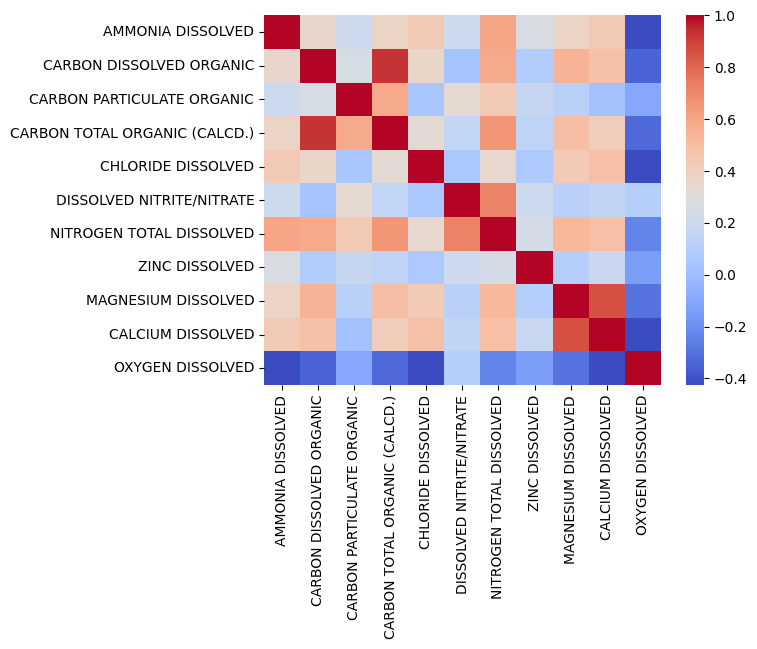

In [11]:
# Correlation plot
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [9]:
result = RegressionPipeline(df_cleaned, 'NITROGEN TOTAL DISSOLVED').result

Linear Regression:
  R-squared: 0.9487156331858672
  RMSE: 0.13190256629936398

Lasso Regression:
  R-squared: 0.9274110189406315
  RMSE: 0.15692643057131148

Ridge Regression:
  R-squared: 0.9489405165511047
  RMSE: 0.1316130503682757

ElasticNet Regression:
  R-squared: 0.9504459917668614
  RMSE: 0.1296582455376855

Lasso Coefficients:
AMMONIA DISSOLVED: 0.16281472749963663
CARBON DISSOLVED ORGANIC: 0.06390307698105807
CARBON PARTICULATE ORGANIC: 0.0
CARBON TOTAL ORGANIC (CALCD.): 0.16174743064780644
CHLORIDE DISSOLVED: 0.0
DISSOLVED NITRITE/NITRATE: 0.35632261252537334
ZINC DISSOLVED: 0.0
MAGNESIUM DISSOLVED: 0.05646476269400435
CALCIUM DISSOLVED: 0.0
OXYGEN DISSOLVED: -0.0


In [10]:
result = RegressionPipeline(df_cleaned, 'OXYGEN DISSOLVED').result

Linear Regression:
  R-squared: 0.41227279753177226
  RMSE: 2.20558519197817

Lasso Regression:
  R-squared: 0.3436250163439015
  RMSE: 2.3308372574033647

Ridge Regression:
  R-squared: 0.4116693963445254
  RMSE: 2.206717104289542

ElasticNet Regression:
  R-squared: 0.36471138156462035
  RMSE: 2.2930919969915666

Lasso Coefficients:
AMMONIA DISSOLVED: -0.5412850242153848
CARBON DISSOLVED ORGANIC: -0.0
CARBON PARTICULATE ORGANIC: -0.01913305887398198
CARBON TOTAL ORGANIC (CALCD.): -0.21956899910537525
CHLORIDE DISSOLVED: -0.6522391956871324
DISSOLVED NITRITE/NITRATE: 0.4059933885943004
NITROGEN TOTAL DISSOLVED: -0.0
ZINC DISSOLVED: -0.1149932498601094
MAGNESIUM DISSOLVED: 0.28007683701635566
CALCIUM DISSOLVED: -0.898745260959258
